# Tutorial 1: Data cleaning & visualization

---

## Introduction

Welcome!, this tutorial will show you how to clean and visualise apple infrared data

First we import some libraries:

In [1]:
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Reading in data </i></b> 

The following code does the following:
- reads data from an Excel file
- converts the Excel file format into a Pandas dataframe 

In [2]:
df_GS = pd.read_excel('/users/hussein/source/apple_classification/data/Detect-GS.xlsx')

<b><i> Examining data </i></b> 

Let's takae a look at the GS apple data

In [3]:
df_GS.head(5)

,Sample,Condition,Age,Source,11995.49,11991.63,11987.78,11983.92,11980.06,11976.21,...,4034.497,4030.64,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.64,3999.783
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607
4,GS-ch-bruise1h-11a,B,1h,S1,-0.166998,-0.166739,-0.166921,-0.166882,-0.166638,-0.166418,...,0.520031,0.521815,0.520814,0.518175,0.518827,0.523526,0.529133,0.532134,0.531992,0.529879


In [4]:
df_GS.shape

(503, 2078)

---

<b><i> Cleaning data </i></b> 

First, let us change the column names, WHY -> because Fred said so.

In [5]:
wavenumbers = np.float_(df_GS.columns[4:])
wavelengths = (1/wavenumbers)*10**7 # changing the wavenumber to a wave length
print("\nThis waveNum ("+str(wavenumbers[0])+") should change to this("+ str(wavelengths[0]) + ") waveLength\n")

df_GS.columns.values[4:] = np.round(wavelengths, 3) # getting just up to 3 decimal numbers
df_GS.head(4)


This waveNum (11995.49) should change to this(833.6466455309454) waveLength



,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607


now let us check the labels

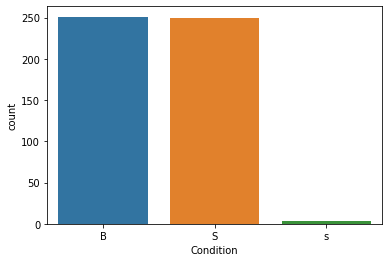

In [6]:
ax = sns.countplot(x="Condition",data=df_GS)

The graph shows that we have two clases of apples "good" -> 'S', and "bad" -> "B".

before we continue further, we need to make the "s" -> "S". (upper case), so that we only have two instead of three classes

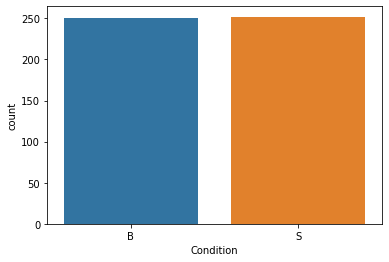

In [7]:
df_GS['Condition'] = df_GS['Condition'].str.upper()
ax = sns.countplot(x="Condition",data=df_GS)

Now we are done cleaning the data

---

<b><i> Getting the inputs and the outputs </i></b> 

In [8]:
# input
df_input_GS = df_GS.iloc[:, 4: ]
df_input_GS.head(3)

,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,-0.113074,-0.113266,-0.114108,-0.114498,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,-0.159698,-0.159639,-0.160184,-0.160504,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,-0.137664,-0.138295,-0.139098,-0.139391,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305


In [13]:
#output
y_GS = df_GS['Condition']

---

<b><i> Data visualisation </i></b> 

now, let us see explore the data, first let us pick 50 random samples

In [14]:
n = 50
rand  = np.random.randint(len(y_GS), size= n)
rand # those are the indices to the apple samples that we will print

array([ 54,  84, 487, 313, 334, 410, 456, 161, 242, 427, 251, 275,  40,
       425, 241, 437, 228, 414, 149, 253, 133, 156, 248, 226, 228, 122,
        32, 176, 418, 423, 164, 493, 105,  39, 318, 140, 107, 271, 468,
       256, 341, 369, 187, 235, 153, 245, 464, 474, 428, 331])

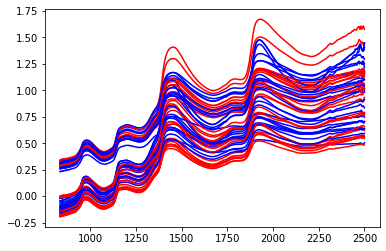

In [15]:
for t in range (n):
    i = rand[t]
    lineSpec =  np.array(df_input_GS.iloc[i]).flatten()
    if y_GS[i] == 'S':
        plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'red') # plotting the good apples
    if y_GS[i] == 'B':
        plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'blue') # plotting the bad apples
    # plt.ylim(-1, 2)
plt.show()

Done

---

In [16]:
# store the data 

In [18]:
%store  df_input_GS
%store  y_GS
%store  df_GS

Stored 'df_input_GS' (DataFrame)
Stored 'y_GS' (Series)
Stored 'df_GS' (DataFrame)
